In [166]:
import numpy as np  
import pandas as pd  
  
import matplotlib.pyplot as plt  
import plotly.express as px  
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)  
  
from sklearn.decomposition import PCA  
  
from sklearn. preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  
  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score, f1_score  
  
import pickle  

### Reading DATASET

In [171]:
dataframe = pd.read_csv('college_place.csv')

### Getting to know the shape of the dataset (rows,columns)

In [119]:
dataframe.shape

(2966, 8)

### Showing first 5 rows of the dataset

In [120]:
dataframe.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### Showing 4 rows of the dataset at random

In [121]:
dataframe.sample(4)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2176,21,Male,Electronics And Communication,0,7,0,0,0
369,21,Male,Information Technology,0,6,0,0,0
2772,21,Male,Information Technology,0,8,0,0,1
156,23,Male,Information Technology,0,5,0,0,0


### Getting to know the data typs of the columns that are in the dataset

In [122]:
dataframe.dtypes

Age                   int64
Gender               object
Stream               object
Internships           int64
CGPA                  int64
Hostel                int64
HistoryOfBacklogs     int64
PlacedOrNot           int64
dtype: object

### getting to know the detailed information of the columns

In [123]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


### Statistical Descriptions of the numerical values in the dataset

In [124]:
dataframe.describe

<bound method NDFrame.describe of       Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBa

# Pre processing phase

### 1. Checing for the missing values

In [125]:
dataframe.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

### 2. Removal of the duplicate values

In [126]:
#Duplicate rows check
print(dataframe.duplicated().sum())

#removal of duplicate rows
dataframe.drop_duplicates(inplace=True)

1829


#### checking if the duplicate rows are removed or not

In [127]:
print(dataframe.duplicated().sum())

0


# EDA

### Exploratory data analysis is an important stage in machine learning, which involves examining and visualizing the data to learn more about its composition, traits, and trends. It is carried out prior to developing the actual machine learning model and is crucial for spotting possible difficulties and choosing the right preprocessing and feature engineering strategies.

In [128]:
figure = px.scatter(dataframe, x="CGPA", y="Internships", color="PlacedOrNot",  
                 hover_data=['CGPA'])  
figure.show()

### Plotting Histogram for the count of place and not placed

In [129]:
px.histogram(dataframe, x='PlacedOrNot', color='PlacedOrNot', barmode='group')  

### Pie Chart: Percentage pie chart of placed or not Placed

In [130]:
figure = px.pie(dataframe, values=dataframe['PlacedOrNot'].value_counts().values, names=dataframe['PlacedOrNot'].value_counts().index, title='Placed Vs Not Placed')  
figure.show()  

### Printing the age of the youngest and Eldest student who is placed

In [131]:
print("Max Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].max()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  
print("Min Age of Placed Person: ",dataframe[(dataframe['Age'] == dataframe['Age'].min()) & (dataframe['PlacedOrNot']==1)]['Age'].values[0])  

Max Age of Placed Person:  30
Min Age of Placed Person:  19


### Printing the Maximum and the Minimum number of internships done by the student who is placed.   
### We will also print the Maximum and Minimum number of students who did the max internship and the minimum number of internships.  

In [132]:
print("Max Internships Done by the Placed Student: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did max Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].max()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  
  
print("Min Internships Done by the Placed Person: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].values[0])  
print("No of students who did min Internships and are placed: ",dataframe[(dataframe['Internships'] == dataframe['Internships'].min()) & (dataframe['PlacedOrNot']==1)]['Internships'].value_counts().values[0])  

Max Internships Done by the Placed Student:  3
No of students who did max Internships and are placed:  35
Min Internships Done by the Placed Person:  0
No of students who did min Internships and are placed:  232


### Printing the Maximum and Minimum number of CGPA obtained by the student who is placed.  
### We will also print the Maximum and the Minimum number of students who got the max CGPA and minimum CGPA who are placed.  
  

In [133]:
print("Max CGPA of Placed Student: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has max CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].max()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  
  
print("Min CGPA of Placed Person: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].values[0])  
print("No of students has min CGPA and are placed: ",dataframe[(dataframe['CGPA'] == dataframe['CGPA'].min()) & (dataframe['PlacedOrNot']==1)]['CGPA'].value_counts().values[0])  

Max CGPA of Placed Student:  9
No of students has max CGPA and are placed:  99
Min CGPA of Placed Person:  5
No of students has min CGPA and are placed:  5


# Representation phase
### The process of statistical representation involves using statistical measures and visualizations to present data in a meaningful and understandable manner with the main objective of enabling the user to understand insights and patterns in the data and make well-informed decisions using the data.

In [134]:
figure = px.box(dataframe, y='CGPA')  
figure.show()  

In [135]:
figure = px.box(dataframe, y='Age')  
figure.show()  

In [136]:
figure = px.box(dataframe, y=['Internships','CGPA', 'Age'])  
figure.show()  

# Encoding Categorical to Numerical
### In machine learning, encoding categorical variables to numeric variables is a typical preprocessing step. It requires changing a qualitative attribute-representing category variable into a numerical variable that may be employed in mathematical operations and models.

### 1. Converting gender column

In [137]:
dataframe['Gender'] = dataframe['Gender'].map({'Male': 1, 'Female': 0})  

### 2. Converting Stream column

In [138]:
dataframe['Stream'].unique()  

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [139]:
dataframe['Stream'] = dataframe['Stream'].map({'Electronics And Communication': 1,  
                                 'Computer Science': 2,  
                                'Information Technology': 3,  
                                'Mechanical':4,  
                                'Electrical':5,  
                                'Civil':6})  

### Checking the changes

In [140]:
dataframe.sample(5)  

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
601,22,0,3,2,7,1,0,1
2463,19,0,2,1,6,1,0,0
30,22,1,4,1,8,1,0,1
1563,23,1,4,1,7,1,0,1
2249,19,1,6,0,8,1,1,1


### Extracting Input and Output Columns

In [141]:
dataframe.corr()['PlacedOrNot']

Age                  0.052444
Gender               0.035367
Stream              -0.077669
Internships          0.164916
CGPA                 0.533497
Hostel              -0.048414
HistoryOfBacklogs   -0.055885
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

In [142]:
X = dataframe.iloc[:,0:7]  
y = dataframe.iloc[:,-1]  
X

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,1,1,8,1,1
1,21,0,2,0,7,1,1
2,22,0,3,1,6,0,0
3,21,1,3,0,8,0,1
4,22,1,4,0,8,1,0
...,...,...,...,...,...,...,...
2946,23,1,3,1,7,1,1
2952,23,1,4,0,8,1,0
2954,23,0,2,1,8,0,1
2958,23,1,2,0,6,0,1


### Getting the shape of the X and Y

In [143]:
print(X.shape)  
print(y.shape)  

(1137, 7)
(1137,)


### Splitting the dataset into training and testing dataset  (70% training and 30% testing)

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30) 

### Getting the Shape of all the training and testing dataset  

In [145]:
print(X_train.shape)  
print(X_test.shape)  
print(y_train.shape)  
print(y_test.shape)  

(795, 7)
(342, 7)
(795,)
(342,)


In [146]:
scaler = StandardScaler()  
X_train_scale = scaler.fit_transform(X_train)  
X_test_scale = scaler.transform(X_test)  

# Training and Evaluating the model
### Training and evaluating the model are the two critical steps in machine learning that determine the accuracy and performance of the model. These steps require careful planning, attention to detail, and rigorous evaluation to develop a model that can generalize well to new, unseen data.

### Here will go with different machine learning algorithms and find their accuracy.

### Creating of a new dataframe named ComparativeStudyTable which keeps the record of the accuracy values of different values


In [147]:
import pandas as pd
comparativeStudyTable=pd.DataFrame(columns=['Model','Without Scaling and Without CV','Without Scaling and With CV','With Scaling Without CV','With Scaling and With CV'])
print(comparativeStudyTable)


Empty DataFrame
Columns: [Model, Without Scaling and Without CV, Without Scaling and With CV, With Scaling Without CV, With Scaling and With CV]
Index: []


## 1. Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)  

comparativeStudyTable.loc[0] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[0,'Model']='Logistic Regression'
comparativeStudyTable.loc[0,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[0,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[0,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[0,'With Scaling and With CV']=with_scaling_with_cv*100

Without Scaling and Without CV:  0.7134502923976608
Without Scaling and With CV:  0.7319620253164557
With Scaling and Without CV:  0.7134502923976608
With Scaling and With CV:  0.7332120253164557


## 2. Decision Tree Classifier

In [149]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier(random_state=0)  
  
#without scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[1] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[1,'Model']='Decision Tree'
comparativeStudyTable.loc[1,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[1,'Without Scaling and With CV']=without_scaling_with_cv*100

  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[1,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[1,'With Scaling and With CV']=with_scaling_with_cv*100

Without Scaling and Without CV:  0.7368421052631579
Without Scaling and With CV:  0.7268829113924051
With Scaling and Without CV:  0.7368421052631579
With Scaling and With CV:  0.7293987341772152


## 3. Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier  
  
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[2] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[2,'Model']='Random Forest'
comparativeStudyTable.loc[2,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[2,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[2,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[2,'With Scaling and With CV']=with_scaling_with_cv*100 

Without Scaling and Without CV:  0.7543859649122807
Without Scaling and With CV:  0.7671677215189873
With Scaling and Without CV:  0.7543859649122807
With Scaling and With CV:  0.7696835443037975


## 4. Support Vector Machines

In [152]:
from sklearn.svm import SVC  
  
svc = SVC()  
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}  
classifier = GridSearchCV(svc, parameters)   
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[3] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[3,'Model']='Support Vector Classifier'
comparativeStudyTable.loc[3,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[3,'Without Scaling and With CV']=without_scaling_with_cv*100
  
  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[3,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[3,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.7339181286549707
Without Scaling and With CV:  0.7570886075949368
With Scaling and Without CV:  0.7660818713450293
With Scaling and With CV:  0.7708227848101266


## 5. Naive Bayes

In [153]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[4] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[4,'Model']='Gaussian Naive Bayes'
comparativeStudyTable.loc[4,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[4,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[4,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[4,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.7280701754385965
Without Scaling and With CV:  0.7583544303797469
With Scaling and Without CV:  0.7280701754385965
With Scaling and With CV:  0.7583544303797469


In [154]:
from sklearn.naive_bayes import MultinomialNB  
classifier = MultinomialNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[5] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[5,'Model']='Multinomial Naive Bayes'
comparativeStudyTable.loc[5,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[5,'Without Scaling and With CV']=without_scaling_with_cv*100





Without Scaling and Without CV:  0.6023391812865497
Without Scaling and With CV:  0.6389873417721519


In [155]:
from sklearn.naive_bayes import BernoulliNB  
classifier = BernoulliNB()  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[6] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[6,'Model']='Bernoulli Naive Bayes'
comparativeStudyTable.loc[6,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[6,'Without Scaling and With CV']=without_scaling_with_cv*100
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[6,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[6,'With Scaling and With CV']=with_scaling_with_cv*100

  

Without Scaling and Without CV:  0.5701754385964912
Without Scaling and With CV:  0.5772626582278482
With Scaling and Without CV:  0.6491228070175439
With Scaling and With CV:  0.6829746835443039


## 6. KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[7] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[7,'Model']='k-Nearest Neighbour'
comparativeStudyTable.loc[7,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[7,'Without Scaling and With CV']=without_scaling_with_cv*100 
  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[6,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[6,'With Scaling and With CV']=with_scaling_with_cv*100
comparativeStudyTable  
   

Without Scaling and Without CV:  0.7280701754385965
Without Scaling and With CV:  0.7419620253164557
With Scaling and Without CV:  0.6842105263157895
With Scaling and With CV:  0.6979430379746836


,Model,Without Scaling and Without CV,Without Scaling and With CV,With Scaling Without CV,With Scaling and With CV
0,Logistic Regression,71.345029,73.196203,71.345029,73.321203
1,Decision Tree,73.684211,72.688291,73.684211,72.939873
2,Random Forest,75.438596,76.716772,75.438596,76.968354
3,Support Vector Classifier,73.391813,75.708861,76.608187,77.082278
4,Gaussian Naive Bayes,72.807018,75.835443,72.807018,75.835443
5,Multinomial Naive Bayes,60.233918,63.898734,None,None
6,Bernoulli Naive Bayes,57.017544,57.726266,68.421053,69.794304
7,k-Nearest Neighbour,72.807018,74.196203,None,None


## 7. SGD Classifier

In [157]:
from sklearn.linear_model import SGDClassifier  
classifier = SGDClassifier(max_iter=1000, tol=1e-3)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[8] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[8,'Model']='Stochastic Gradient Descent'
comparativeStudyTable.loc[8,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[8,'Without Scaling and With CV']=without_scaling_with_cv*100   
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[8,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[8,'With Scaling and With CV']=with_scaling_with_cv*100

Without Scaling and Without CV:  0.6842105263157895
Without Scaling and With CV:  0.6649841772151899
With Scaling and Without CV:  0.6578947368421053
With Scaling and With CV:  0.7106487341772152


## 8. Perceptron 

In [158]:
from sklearn.linear_model import Perceptron  
  
classifier = Perceptron(tol=1e-3, random_state=0)  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[9] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[9,'Model']='Perceptron'
comparativeStudyTable.loc[9,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[9,'Without Scaling and With CV']=without_scaling_with_cv*100  
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale) 
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[9,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[9,'With Scaling and With CV']=with_scaling_with_cv*100


Without Scaling and Without CV:  0.4766081871345029
Without Scaling and With CV:  0.5732753164556962
With Scaling and Without CV:  0.6608187134502924
With Scaling and With CV:  0.6438449367088607


In [160]:
from sklearn.linear_model import LogisticRegressionCV  
classifier = LogisticRegressionCV(cv=5, random_state=0)  
  
# Without Scaling  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
without_scaling_no_cv=accuracy_score(y_test,y_pred)
print("Without Scaling and Without CV: ",without_scaling_no_cv)  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
without_scaling_with_cv=scores.mean()
print("Without Scaling and With CV: ",without_scaling_with_cv)

comparativeStudyTable.loc[10] = [None] * len(comparativeStudyTable.columns)

comparativeStudyTable.loc[10,'Model']='Logistic regression CV'
comparativeStudyTable.loc[10,'Without Scaling and Without CV']=without_scaling_no_cv*100
comparativeStudyTable.loc[10,'Without Scaling and With CV']=without_scaling_with_cv*100 
  
# With Scaling  
classifier.fit(X_train_scale,y_train)  
y_pred = classifier.predict(X_test_scale)  
with_scaling_no_cv=accuracy_score(y_test,y_pred)
print("With Scaling and Without CV: ",with_scaling_no_cv)  
scores = cross_val_score(classifier, X_train_scale, y_train, cv=10) 
with_scaling_with_cv= scores.mean()
print("With Scaling and With CV: ",with_scaling_with_cv)  

comparativeStudyTable.loc[10,'With Scaling Without CV']=with_scaling_no_cv*100
comparativeStudyTable.loc[10,'With Scaling and With CV']=with_scaling_with_cv*100
comparativeStudyTable


Without Scaling and Without CV:  0.7134502923976608
Without Scaling and With CV:  0.7319936708860759
With Scaling and Without CV:  0.716374269005848
With Scaling and With CV:  0.7369620253164557


,Model,Without Scaling and Without CV,Without Scaling and With CV,With Scaling Without CV,With Scaling and With CV
0,Logistic Regression,71.345029,73.196203,71.345029,73.321203
1,Decision Tree,73.684211,72.688291,73.684211,72.939873
2,Random Forest,75.438596,76.716772,75.438596,76.968354
3,Support Vector Classifier,73.391813,75.708861,76.608187,77.082278
4,Gaussian Naive Bayes,72.807018,75.835443,72.807018,75.835443
5,Multinomial Naive Bayes,60.233918,63.898734,None,None
6,Bernoulli Naive Bayes,57.017544,57.726266,68.421053,69.794304
7,k-Nearest Neighbour,72.807018,74.196203,None,None
8,Stochastic Gradient Descent,68.421053,66.498418,65.789474,71.064873
9,Perceptron,47.660819,57.327532,66.081871,64.384494


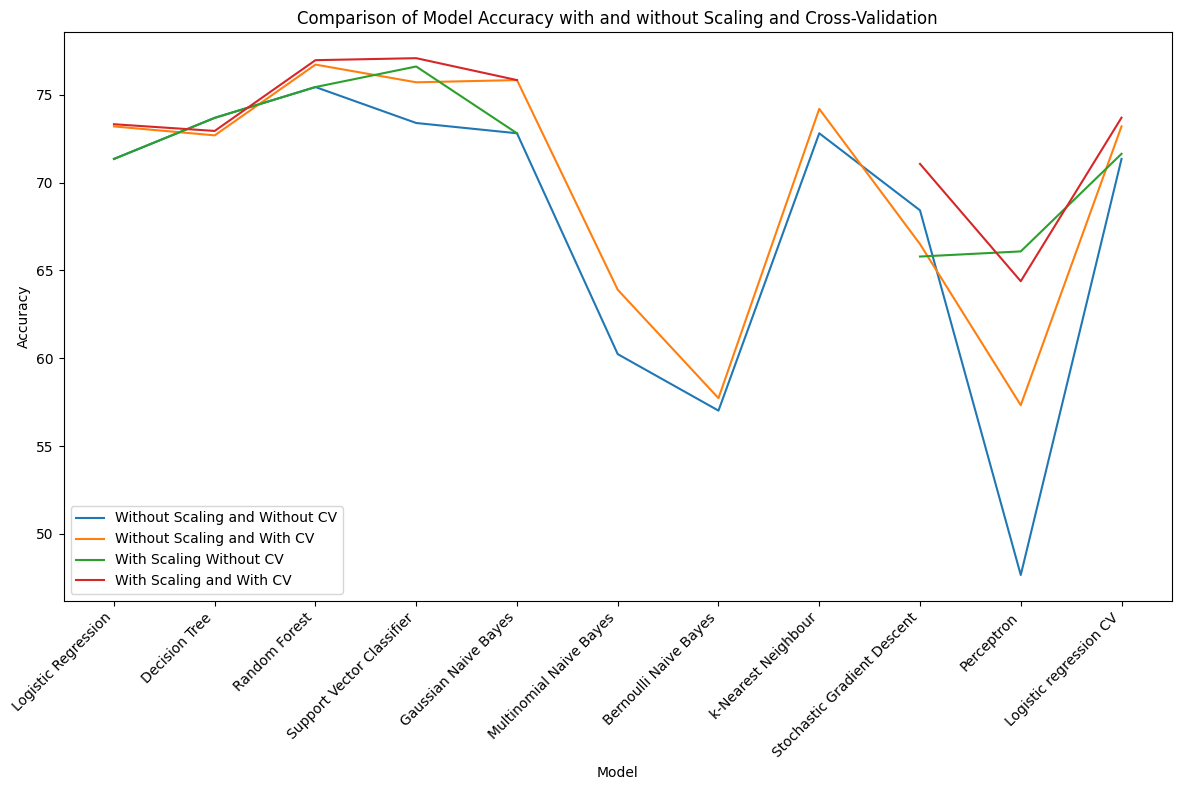

In [175]:
fig, ax = plt.subplots(figsize=(12, 8))
for column in comparativeStudyTable.columns[1:]:
    ax.plot(comparativeStudyTable['Model'], comparativeStudyTable[column], label=column)

# Customize the plot
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracy with and without Scaling and Cross-Validation')
ax.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


# Model Selection
### After observing the scores by training different models Random Forest Classifier is considered as the best 

In [176]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))  

Without CV:  0.7543859649122807
With CV:  0.7671677215189873
Precision Score:  0.7936507936507936
Recall Score:  0.7692307692307693
F1 Score:  0.78125


# Tuning of the Model

# Using Hyper-Parameter tuning using GridsearchCV, Hypertune the parameters for Random forest and get the best parameters.

In [162]:
param_grid = {  
    'bootstrap': [False,True],  
    'max_depth': [5,8,10, 20],  
    'max_features': [3, 4, 5, None],  
    'min_samples_split': [2, 10, 12],  
    'n_estimators': [100, 200, 300]  
}  
  
rfclassifier = RandomForestClassifier()  
  
classifier = GridSearchCV(estimator = rfclassifier, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)  
  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Accuracy: ",accuracy_score(y_test,y_pred))  
print(classifier.best_params_)  
print(classifier.best_estimator_)  

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy:  0.8187134502923976
{'bootstrap': False, 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=False, max_depth=5, max_features=None)


### Checking the accuracy of the model with the best parameters

In [164]:
classifier = RandomForestClassifier(bootstrap=False, max_depth=5,max_features=None,  
                             min_samples_split=2,  
                             n_estimators=100, random_state=0)  
classifier.fit(X_train,y_train)  
y_pred = classifier.predict(X_test)  
print("Without CV: ",accuracy_score(y_test,y_pred))  
scores = cross_val_score(classifier, X_train, y_train, cv=10)  
print("With CV: ",scores.mean())  
print("Precision Score: ", precision_score(y_test, y_pred))  
print("Recall Score: ", recall_score(y_test, y_pred))  
print("F1 Score: ", f1_score(y_test, y_pred))  

Without CV:  0.8187134502923976
With CV:  0.8200316455696202
Precision Score:  0.884393063583815
Recall Score:  0.7846153846153846
F1 Score:  0.8315217391304348


# Conclusion

### The likelihood that a student will be hired by a firm may be predicted using placement prediction utilizing machine learning techniques. The application of machine learning algorithms offers a more data-driven and objective approach to the hiring process, allowing businesses to find potential applicants who would have gone unnoticed using conventional hiring techniques. Machine learning is becoming more and more prevalent across a wide range of sectors, and placement prediction using machine learning algorithms is poised to become a crucial tool in the hiring process.